# Some useful plotting tricks

## Maps and projections

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import cmocean.cm as cm
import matplotlib.pyplot as plt

In [2]:
ds = xr.tutorial.load_dataset("ersstv5")

In [3]:
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 10kB 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (time, lat, lon) float32 40MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

### A single map

The basic plot:

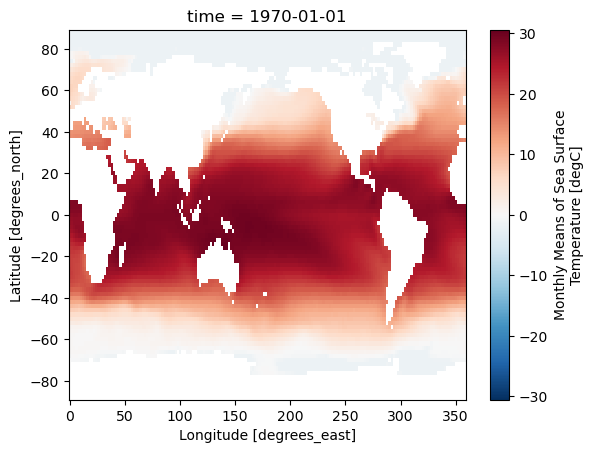

In [4]:
ds["sst"].isel(time=0).plot()

Let's customize. There are different places to adjust:
* axes keyword arguments (kwargs)
* plot kwargs
* colorbar kwargs
* some things need to be edited in low level

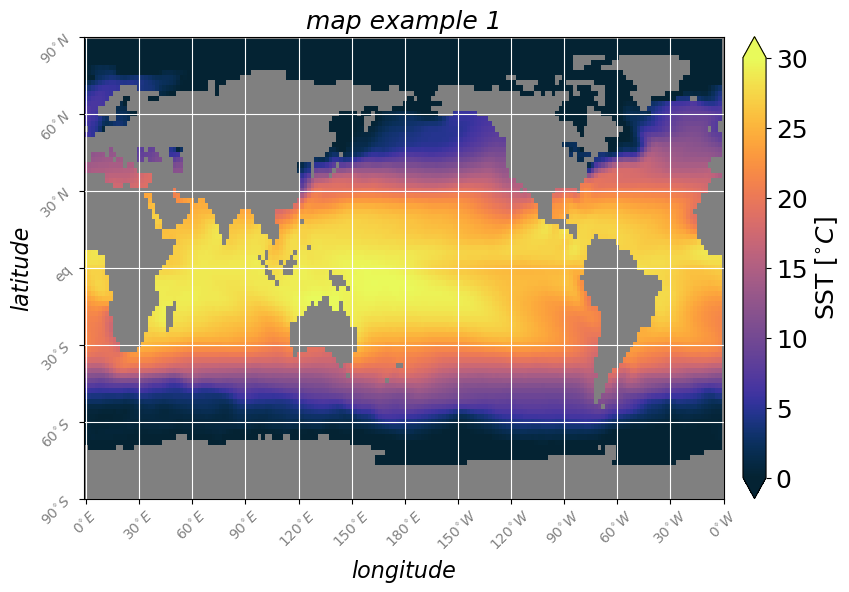

In [5]:
# global setting for font size
# do that for elements hard to access like colorbar label and ticks
import matplotlib
matplotlib.rcParams.update({"font.size":18})

# some parameters as set up at the "figure" level
# - figure size,..
fig_kwargs = dict(figsize=[10,6])
# some parameters as set up at the "axes" level
# - background color,...
ax_kwargs = dict(facecolor="grey")
# some parameters as set up at the "plot" level (data dependent)
# - colormap, min/max array,...
plot_kwargs=dict(cmap=cm.thermal, vmin=0, vmax=30)
# colorbar parameters are set independently
cbar_kwargs=dict(label=r'SST [$^{\circ}C$]', ticks=[0,5,10,15,20,25,30], pad=0.025, extend="both")

plt.figure(**fig_kwargs)
ax = plt.axes(**ax_kwargs)
ds["sst"].isel(time=0).plot(**plot_kwargs, cbar_kwargs=cbar_kwargs)

# some other things are done in "post"

# labels for x and y axis
ax.set_xlabel("longitude", fontsize=16, style="italic")
ax.set_ylabel("latitude", fontsize=16, style="italic")

# setting up the ticks spacing and labels
ax.set_xticks(np.arange(0,360+30,30))
ax.set_xticklabels(labels=[r"$0^{\circ}E$",r"$30^{\circ}E$",r"$60^{\circ}E$",
                           r"$90^{\circ}E$",r"$120^{\circ}E$",r"$150^{\circ}E$",
                           r"$180^{\circ}E$",r"$150^{\circ}W$", r"$120^{\circ}W$",
                           r"$90^{\circ}W$",r"$60^{\circ}W$",r"$30^{\circ}W$",
                           r"$0^{\circ}W$"],
                   fontsize=10, rotation=45, color="grey")
                   
ax.set_yticks(np.arange(-90,90+30,30))
ax.set_yticklabels(labels=[r"$90^{\circ}S$", r"$60^{\circ}S$",r"$30^{\circ}S$","eq",
                           r"$30^{\circ}N$",r"$60^{\circ}N$",r"$90^{\circ}N$"],
                   fontsize=10, rotation=45, color="grey")

ax.set_title("map example 1", fontsize=18, style="italic")
ax.grid(color="white")
# show the figure
plt.draw()

Let's introduce more parameters with map projections

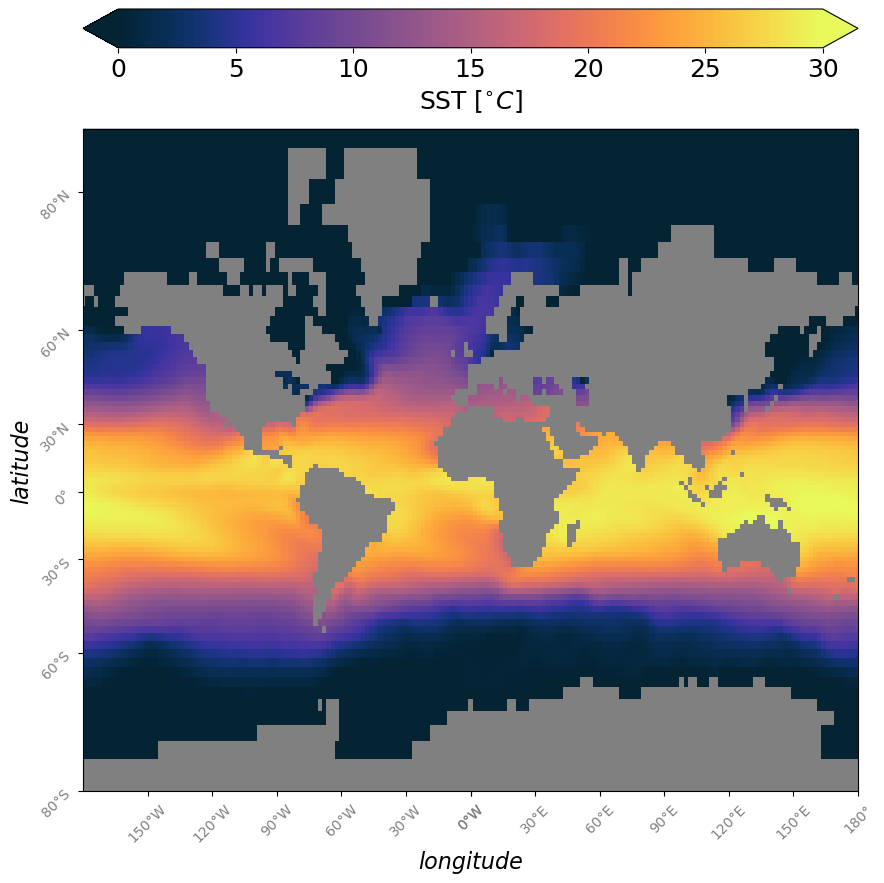

In [6]:
# global setting for font size
# do that for elements hard to access like colorbar label and ticks
import matplotlib
matplotlib.rcParams.update({"font.size":18})

# some parameters as set up at the "figure" level
# - figure size,..
fig_kwargs = dict(figsize=[10,8])
# some parameters as set up at the "axes" level
# - background color,...
ax_kwargs = dict(facecolor="grey", projection=ccrs.Mercator())
# some parameters as set up at the "plot" level (data dependent)
# - colormap, min/max array,...
plot_kwargs=dict(cmap=cm.thermal, vmin=0, vmax=30, transform=ccrs.PlateCarree())
# colorbar parameters are set independently
cbar_kwargs=dict(label=r'SST [$^{\circ}C$]', ticks=[0,5,10,15,20,25,30], pad=-1.27,
                 orientation="horizontal", extend="both")

plt.figure(**fig_kwargs)
ax = plt.axes(**ax_kwargs)
ds["sst"].isel(time=0).plot(**plot_kwargs, cbar_kwargs=cbar_kwargs)

# some other things are done in "post"

# labels for x and y axis
ax.set_xlabel("longitude", fontsize=16, style="italic")
ax.set_ylabel("latitude", fontsize=16, style="italic")

# setting up the ticks spacing and labels
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

ax.set_xticks(np.arange(0,360+30,30), crs=ccrs.PlateCarree())
ax.set_xticklabels(labels=[r"$0^{\circ}E$",r"$30^{\circ}E$",r"$60^{\circ}E$",
                           r"$90^{\circ}E$",r"$120^{\circ}E$",r"$150^{\circ}E$",
                           r"$180^{\circ}E$",r"$150^{\circ}W$", r"$120^{\circ}W$",
                           r"$90^{\circ}W$",r"$60^{\circ}W$",r"$30^{\circ}W$",
                           r"$0^{\circ}W$"],
                   fontsize=10, rotation=45, color="grey")

ax.set_yticks([-80,-60,-30,-0,30,60,80], crs=ccrs.PlateCarree())
ax.set_yticklabels(labels=[r"$80^{\circ}S$", r"$60^{\circ}S$",r"$30^{\circ}S$","eq",
                           r"$30^{\circ}N$",r"$60^{\circ}N$",r"$80^{\circ}N$"],
                   fontsize=10, rotation=45, color="grey")

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)                   



ax.set_title("", fontsize=18, style="italic")
# show the figure
plt.draw()

### multiple maps

In [7]:
seasons = ds["sst"].groupby(ds["time"].dt.season).mean(dim="time")
_ = seasons.load()

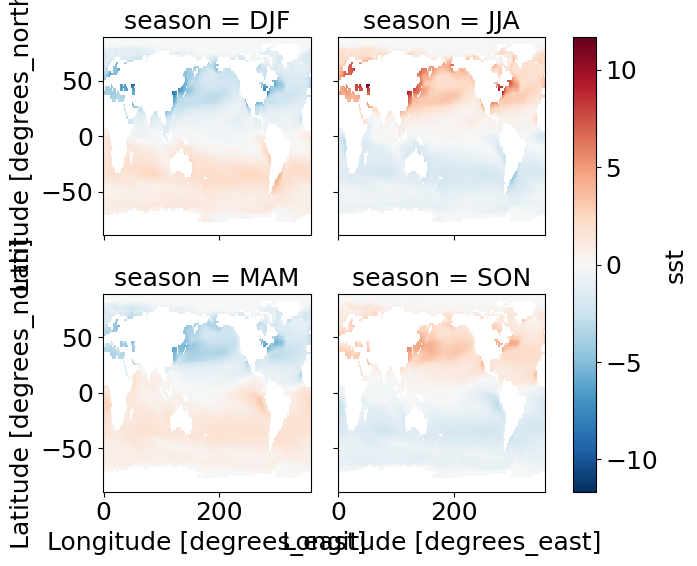

In [8]:
(seasons - seasons.mean(dim="season")).plot(x="lon", y="lat", col="season", col_wrap=2)

Let's tweak

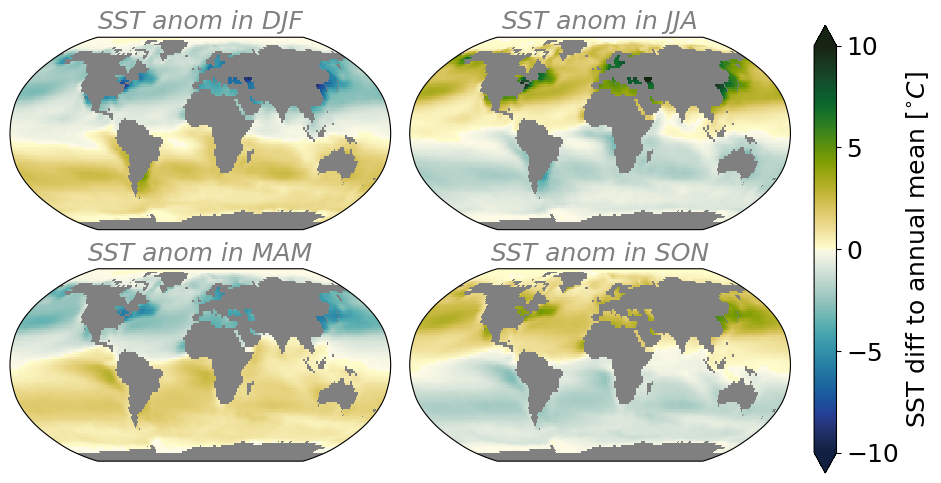

In [10]:
# some parameters as set up at the "figure" level
# - figure size,..
fig_kwargs = dict(figsize=[10,8])
# some parameters as set up at the "axes" level
# - background color,...
ax_kwargs = dict(facecolor="grey", projection=ccrs.Robinson())
# some parameters as set up at the "plot" level (data dependent)
# - colormap, min/max array,...
plot_kwargs=dict(cmap=cm.delta, vmin=-10, vmax=10, transform=ccrs.PlateCarree())
# colorbar parameters are set independently
cbar_kwargs=dict(label=r'SST diff to annual mean [$^{\circ}C$]', ticks=[-10,-5,0,5,10],
                 pad=0.025, shrink=0.6, orientation="vertical", extend="both")

grid = (seasons - seasons.mean(dim="season")).plot(x="lon", y="lat", col="season", col_wrap=2,
                                                   subplot_kws=ax_kwargs, **plot_kwargs, **fig_kwargs,
                                                   add_labels=False, add_colorbar=False)


grid.set_titles(template='SST anom in {value}', style="italic", color="grey")

plt.subplots_adjust(hspace=-0.55, wspace=0.05)

grid.add_colorbar(**cbar_kwargs)
plt.draw()